In [1]:
import numpy as np
import cv2 
import skimage.exposure
import skimage.io
import matplotlib.pyplot as plt

%matplotlib inline

# Задача №3 - Найди клетки

Даны снимки раковых клеток. Существует задача - определить стадию рака клетки по такому изображению. Для того, чтобы подойти к решению классификации рака клетки, необходимо сначала подготовить данные.

Исходные изображения в реальных задачах могут быть очень большого размера (более 20000 px). Однако из визуального анализа можно заметить, что большая часть этих снимков пустая и не несет в себе полезную информацию.

Ваша задача выделить небольшие ячейки изображений из исходного так, чтобы на ячейках было только изображение клетки.

Пример исходного изображения и нарезанных ячеек клетки.
<img src="../img/cell_example.png" alt="Drawing" style="width: 500px;"/>

В качестве аргументов у функции будут значения:
1. исходное изображние;
2. размер ячейки;
3. количество ячеек.

__Доп вопрос__ - как можно выяснить какие нужны значения аргументов, чтобы они подходили для большинства исходных снимков?

In [139]:
def search_cells(image, size, number, threshold=220):
    image_buff = image.copy()
    number_buff = number
    number -= 1
    res_size = int(np.ceil(number**(1/2))*size)
    res_image = np.full((res_size, res_size, 3), 255)
    h,w,_ = image.shape
    step = int(size//5)
    for i in range(0, h-size, step):
        for j in range(0, w-size, step):
            if number < 0:
                return res_image, image
            hist, bins = np.histogram(image[i:i+size, j:j+size, 0].ravel(), 256, [0, 256])
            if np.argmax(hist) < threshold:
                I, J = number//(res_size//size), number%(res_size//size)
                res_image[I*size:(I+1)*size, J*size:(J+1)*size] = image[i:i+size, j:j+size]
                image[i:i+size, j:j+size] = [255, 255, 255]
                number -= 1
    if number >= 0 and threshold < 250:
        print(number+1, 'sells to find left, moving threshold to', threshold+10)
        return search_cells(image_buff, size, number_buff, threshold+10)
    return res_image, image

(5376, 1368, 3)
18 sells to find left, moving threshold to 230
6 sells to find left, moving threshold to 240
6 sells to find left, moving threshold to 250


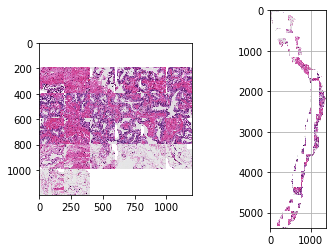

In [144]:
image = cv2.imread('./cells/train3_1.jpeg')
image = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
print(np.shape(image))
res, img = search_cells(image, 200, 32)
plt.subplot(121)
plt.imshow(res)
plt.subplot(122)
plt.imshow(img)
plt.grid()